<a href="https://colab.research.google.com/github/MinhFus/MachineLearning/blob/main/Lab_6_20130365_DoMinhPhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [102]:
# code
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Import Drive

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/NLU/MayHoc/BaiTap'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/NLU/MayHoc/BaiTap


#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# code
mnist = datasets.load_digits(as_frame=True)
x_task1 = mnist.data
y_task1= mnist.target

# Without using selection feature

In [ ]:
# code
X_train, X_test, Y_train, Y_test = train_test_split(x_task1,y_task1, test_size = 0.3, train_size=0.7,random_state=1)

In [ ]:
# Random Forest without using selection feature
rf_w = RandomForestClassifier(n_estimators=100)
rf_w.fit(X_train, Y_train)
y_pred_rf_w = rf_w.predict(X_test)

aces_RF_w = round(metrics.accuracy_score(Y_test, y_pred_rf_w),4)
precision_RF_w = round(metrics.precision_score(Y_test, y_pred_rf_w, average='macro'),4)
recall_RF_w = round(metrics.recall_score(Y_test, y_pred_rf_w, average='macro'),4)
f1_RF_w = round(metrics.f1_score(Y_test, y_pred_rf_w, average='macro'),4)

In [ ]:
# NaiveBayes without using selection feature
nb_w = GaussianNB()
nb_w.fit(X_train, Y_train)
y_pred_NB_w = nb_w.predict(X_test)

aces_NB_w = round(metrics.accuracy_score(Y_test, y_pred_NB_w),4)
precision_NB_w =round(metrics.precision_score(Y_test, y_pred_NB_w, average='macro'),4)
recall_NB_w = round(metrics.recall_score(Y_test, y_pred_NB_w, average='macro'),4)
f1_NB_w = round(metrics.f1_score(Y_test, y_pred_NB_w, average='macro'),4)

In [ ]:
# Suport Vector Machine 
# Linear Kernel without using selection feature
smv_ln_w = svm.SVC(kernel='linear')
smv_ln_w.fit(X_train, Y_train)
y_pred_ln_w = smv_ln_w.predict(X_test)

aces_LN_w = round(metrics.accuracy_score(Y_test, y_pred_ln_w),4)
precision_LN_w = round(metrics.precision_score(Y_test, y_pred_ln_w, average='macro'),4)
recall_LN_w = round(metrics.recall_score(Y_test, y_pred_ln_w, average='macro'),4)
f1_LN_w = round(metrics.f1_score(Y_test, y_pred_ln_w, average='macro'),4)

# Using selection feature



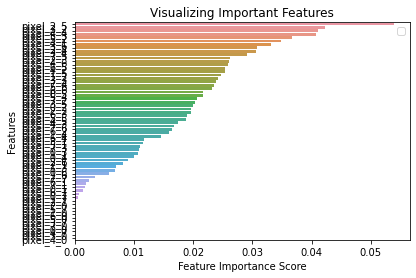

In [ ]:
# code
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_task1,y_task1)
feature_imp = pd.Series(clf.feature_importances_, index= mnist.feature_names).sort_values(ascending=False)

# feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

features = feature_imp.index[0:4].values
X_new = x_task1[feature_imp.index[0:4]]

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new,y_task1, test_size = 0.3, train_size=0.7,random_state=1)

In [ ]:
# Random Forest using selection feature
rf_u = RandomForestClassifier(n_estimators=100)
rf_u.fit(X_train_new, Y_train_new)
y_pred_rf_u = rf_u.predict(X_test_new)

aces_RF_u = round(metrics.accuracy_score(Y_test_new, y_pred_rf_u),4)
precision_RF_u = round(metrics.precision_score(Y_test_new,y_pred_rf_u, average='macro'),4)
recall_RF_u = round(metrics.recall_score(Y_test_new, y_pred_rf_u, average='macro'),4)
f1_RF_u = round(metrics.f1_score(Y_test_new, y_pred_rf_u, average='macro'),4)

In [ ]:
# NaiveBayes using selection feature
nb_u = GaussianNB()
nb_u.fit(X_train_new, Y_train_new)
y_pred_NB_u = nb_u.predict(X_test_new)

aces_NB_u = round(metrics.accuracy_score(Y_test_new, y_pred_NB_u),4)
precision_NB_u =round(metrics.precision_score(Y_test_new, y_pred_NB_u, average='macro'),4)
recall_NB_u = round(metrics.recall_score(Y_test_new, y_pred_NB_u, average='macro'),4)
f1_NB_u = round(metrics.f1_score(Y_test_new, y_pred_NB_u, average='macro'),4)

In [ ]:
# Suport Vector Machine 
# Linear Kernel using selection feature
smv_ln_u = svm.SVC(kernel='linear')
smv_ln_u.fit(X_train_new, Y_train_new)
y_pred_ln_u = smv_ln_u.predict(X_test_new)

aces_LN_u = round(metrics.accuracy_score(Y_test_new, y_pred_ln_u),4)
precision_LN_u = round(metrics.precision_score(Y_test_new, y_pred_ln_u, average='macro'),4)
recall_LN_u = round(metrics.recall_score(Y_test_new, y_pred_ln_u, average='macro'),4)
f1_LN_u = round(metrics.f1_score(Y_test_new, y_pred_ln_u, average='macro'),4)

# Compare without using and using

In [ ]:
table_w = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])
table_u = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_w.add_row(["Random Forest ",aces_RF_w,precision_RF_w,recall_RF_w,f1_RF_w])
table_w.add_row(["NaiveBayes ",aces_NB_w,precision_NB_w,recall_NB_w,f1_NB_w])
table_w.add_row(["Suport Vector Machine ",aces_LN_w,precision_LN_w,recall_LN_w,f1_LN_w])

table_u.add_row(["Random Forest ",aces_RF_u,precision_RF_u,recall_RF_u,f1_RF_u])
table_u.add_row(["NaiveBayes ",aces_NB_u,precision_NB_u,recall_NB_u,f1_NB_u])
table_u.add_row(["Suport Vector Machine ",aces_LN_u,precision_LN_u,recall_LN_u,f1_LN_u])

print('Without using selection feature')
print(table_w)
print()
print('Using selection feature')
print(table_u)

Without using selection feature
+------------------------+----------+-----------+--------+--------+
|                        | Accuracy | Precision | Recall |   F1   |
+------------------------+----------+-----------+--------+--------+
|     Random Forest      |  0.9815  |   0.981   | 0.9828 | 0.9816 |
|      NaiveBayes        |  0.8315  |   0.8564  | 0.8298 | 0.8292 |
| Suport Vector Machine  |  0.9815  |   0.9809  | 0.9811 | 0.981  |
+------------------------+----------+-----------+--------+--------+

Using selection feature
+------------------------+----------+-----------+--------+--------+
|                        | Accuracy | Precision | Recall |   F1   |
+------------------------+----------+-----------+--------+--------+
|     Random Forest      |  0.6352  |   0.6392  | 0.6362 | 0.6326 |
|      NaiveBayes        |  0.6148  |   0.5876  | 0.6126 | 0.5734 |
| Suport Vector Machine  |  0.6333  |   0.616   | 0.6297 | 0.6123 |
+------------------------+----------+-----------+--------+-

#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [ ]:
df = pd.read_csv('bank.csv')
x_task2 =df[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]
x1_task2 =df[[ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
y_task2 = df[[ 'deposit']]
# df.columns
# print(x_task2)

#2.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
# StandardScaler
object= StandardScaler()
scale = object.fit_transform(x_task2)
print(scale)

[[ 1.492  0.253 -1.266 -0.554 -0.481 -0.363]
 [ 1.24  -0.46  -1.266 -0.554 -0.481 -0.363]
 [-0.019 -0.08  -1.266 -0.554 -0.481 -0.363]
 ...
 [-0.775 -0.465  0.397 -0.187 -0.481 -0.363]
 [ 0.148 -0.474 -0.909 -0.187  1.11   1.818]
 [-0.607 -0.474 -0.791 -0.554 -0.481 -0.363]]


#2.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
# Encode Categorica
onehot = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
encode = onehot.fit_transform(x1_task2)
print(encode.shape)
merged = np.hstack((x_task2.values,encode))
print(merged.shape)

(11162, 35)
(11162, 41)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#2.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
# code
X_train_task2, X_test_task2, Y_train_task2, Y_test_task2 = train_test_split(merged, y_task2, test_size = 0.3, train_size=0.7,random_state=1)

In [ ]:
# Decision Tree
clf_DT = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_DT.fit(X_train_task2, Y_train_task2)
y_pred_DT = clf_DT.predict(X_test_task2)

aces_DT = round(metrics.accuracy_score(Y_test_task2,y_pred_DT),4)
precision_DT = round(metrics.precision_score(Y_test_task2, y_pred_DT, average='macro'),4)
recall_DT = round(metrics.recall_score(Y_test_task2, y_pred_DT, average='macro'),4)
f1_DT = round(metrics.f1_score(Y_test_task2, y_pred_DT, average='macro'),4)

In [ ]:
# Random Forest 
rf_task2 = RandomForestClassifier(n_estimators=100)
rf_task2.fit(X_train_task2, Y_train_task2)
y_pred_rf_task2 = rf_task2.predict(X_test_task2)

aces_RF = round(metrics.accuracy_score(Y_test_task2, y_pred_rf_task2),4)
precision_RF = round(metrics.precision_score(Y_test_task2,y_pred_rf_task2, average='macro'),4)
recall_RF = round(metrics.recall_score(Y_test_task2, y_pred_rf_task2, average='macro'),4)
f1_RF = round(metrics.f1_score(Y_test_task2, y_pred_rf_task2, average='macro'),4)

<ipython-input-49-e6d33923f1f3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_task2.fit(X_train_task2, Y_train_task2)


In [ ]:
# kNN
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X_train_task2, Y_train_task2)
y_pred_kNN = kNN.predict(X_test_task2)

aces_kNN = round(metrics.accuracy_score(Y_test_task2, y_pred_kNN ),4)
precision_kNN = round(metrics.precision_score(Y_test_task2, y_pred_kNN , average='macro'),4)
recall_kNN = round(metrics.recall_score(Y_test_task2, y_pred_kNN , average='macro'),4)
f1_kNN = round(metrics.f1_score(Y_test_task2, y_pred_kNN , average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# NaiveBayes 
nb_task2 = GaussianNB()
nb_task2.fit(X_train_task2, Y_train_task2)
y_pred_NB = nb_task2.predict(X_test_task2)

aces_NB = round(metrics.accuracy_score(Y_test_task2, y_pred_NB),4)
precision_NB =round(metrics.precision_score(Y_test_task2, y_pred_NB, average='macro'),4)
recall_NB = round(metrics.recall_score(Y_test_task2, y_pred_NB, average='macro'),4)
f1_NB = round(metrics.f1_score(Y_test_task2, y_pred_NB, average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
table_task2 = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_task2.add_row(["Decision Tree ", aces_DT, precision_DT, recall_DT, f1_DT])
table_task2.add_row(["Random Forest  ",aces_RF, precision_RF, recall_RF, f1_RF])
table_task2.add_row(["KNN  ",aces_kNN, precision_kNN, recall_kNN, f1_kNN])
table_task2.add_row(["NaiveBayes   ",aces_NB, precision_NB, recall_NB, f1_NB])

print(table_task2)

+-----------------+----------+-----------+--------+--------+
|                 | Accuracy | Precision | Recall |   F1   |
+-----------------+----------+-----------+--------+--------+
|  Decision Tree  |  0.6411  |   0.6415  | 0.6418 | 0.641  |
| Random Forest   |  0.7148  |   0.7181  | 0.7104 | 0.7105 |
|      KNN        |   0.59   |   0.5883  | 0.5858 | 0.5847 |
|  NaiveBayes     |  0.6808  |   0.7009  | 0.6714 | 0.6648 |
+-----------------+----------+-----------+--------+--------+


#2.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [ ]:
# code
clf_task2 = RandomForestClassifier(n_estimators=100)
lenght = range(0,41)
clf_task2.fit(merged,y_task2)
feature_imp_task2 = pd.Series(clf.feature_importances_, index= lenght).sort_values(ascending=False)

features = feature_imp.index[0:4].values
X_task2_new = merged[:,feature_imp.index[0:4]]

X_task2_train_new, X_task2_test_new, Y_task2_train_new, Y_task2_test_new = train_test_split(X_task2_new,y_task2, test_size = 0.3, train_size=0.7,random_state=1)
print(X_task2_train_new.shape)
print(X_task2_test_new.shape)
print(Y_task2_train_new.shape)
print(Y_task2_test_new.shape)

<ipython-input-60-261c7bd976cf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_task2.fit(merged,y_task2)


(7813, 4)
(3349, 4)
(7813, 1)
(3349, 1)


In [ ]:
# Decision Tree
clf_DT_task2 = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_DT_task2.fit(X_task2_train_new, Y_task2_train_new)
y_pred_DT_task2 = clf_DT_task2.predict(X_task2_test_new)

aces_DT_new = round(metrics.accuracy_score(Y_task2_test_new,y_pred_DT_task2),4)
precision_DT_new = round(metrics.precision_score(Y_task2_test_new, y_pred_DT_task2, average='macro'),4)
recall_DT_new = round(metrics.recall_score(Y_task2_test_new, y_pred_DT_task2, average='macro'),4)
f1_DT_new = round(metrics.f1_score(Y_task2_test_new, y_pred_DT_task2, average='macro'),4)

In [ ]:
# Random Forest 
rf_task2_new = RandomForestClassifier(n_estimators=100)
rf_task2_new.fit(X_task2_train_new, Y_task2_train_new)
y_pred_rf_task2_new = rf_task2_new.predict(X_task2_test_new)

aces_RF_new = round(metrics.accuracy_score(Y_task2_test_new,y_pred_rf_task2_new),4)
precision_RF_new = round(metrics.precision_score(Y_task2_test_new,y_pred_rf_task2_new, average='macro'),4)
recall_RF_new = round(metrics.recall_score(Y_task2_test_new,y_pred_rf_task2_new, average='macro'),4)
f1_RF_new = round(metrics.f1_score(Y_task2_test_new,y_pred_rf_task2_new, average='macro'),4)

<ipython-input-66-2ae30b6bbbb7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_task2_new.fit(X_task2_train_new, Y_task2_train_new)


In [ ]:
# kNN
kNN_task2_new = KNeighborsClassifier(n_neighbors = 5)
kNN_task2_new.fit(X_task2_train_new, Y_task2_train_new)
y_pred_kNN_task2_new = kNN_task2_new.predict(X_task2_test_new)

aces_kNN_new = round(metrics.accuracy_score(Y_task2_test_new, y_pred_kNN_task2_new ),4)
precision_kNN_new = round(metrics.precision_score(Y_task2_test_new, y_pred_kNN_task2_new, average='macro'),4)
recall_kNN_new = round(metrics.recall_score(Y_task2_test_new, y_pred_kNN_task2_new , average='macro'),4)
f1_kNN_new = round(metrics.f1_score(Y_task2_test_new, y_pred_kNN_task2_new , average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# NaiveBayes 
nb_task2_new = GaussianNB()
nb_task2_new.fit(X_task2_train_new, Y_task2_train_new)
y_pred_NB_new = nb_task2_new.predict(X_task2_test_new)

aces_NB_new = round(metrics.accuracy_score(Y_task2_test_new, y_pred_NB_new),4)
precision_NB_new =round(metrics.precision_score(Y_task2_test_new, y_pred_NB_new, average='macro'),4)
recall_NB_new = round(metrics.recall_score(Y_task2_test_new, y_pred_NB_new, average='macro'),4)
f1_NB_new = round(metrics.f1_score(Y_task2_test_new, y_pred_NB_new, average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
table_task2_new = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_task2_new.add_row(["Decision Tree ", aces_DT_new, precision_DT_new, recall_DT_new, f1_DT_new])
table_task2_new.add_row(["Random Forest  ",aces_RF_new, precision_RF_new, recall_RF_new, f1_RF_new])
table_task2_new.add_row(["KNN  ", aces_kNN_new, precision_kNN_new, recall_kNN_new, f1_kNN_new])
table_task2_new.add_row(["NaiveBayes   ", aces_NB_new, precision_NB_new, recall_NB_new, f1_NB_new])

print(table_task2_new)

+-----------------+----------+-----------+--------+--------+
|                 | Accuracy | Precision | Recall |   F1   |
+-----------------+----------+-----------+--------+--------+
|  Decision Tree  |  0.5778  |   0.639   | 0.5585 | 0.4943 |
| Random Forest   |  0.6056  |   0.604   | 0.6022 | 0.6018 |
|      KNN        |  0.5775  |   0.5758  | 0.5753 | 0.5753 |
|  NaiveBayes     |  0.5539  |   0.5758  | 0.5641 | 0.5403 |
+-----------------+----------+-----------+--------+--------+


#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [104]:
# code
df_task4 = pd.read_csv('creditcard.csv')
x_task4 = df_task4.iloc[:,:-1]
y_task4 = df_task4[['Class']]

In [105]:
clf_task4 = RandomForestClassifier(n_estimators=100)
# lenght = range(0,41)
clf_task4.fit(x_task4.head(100),y_task4.head(100))
feature_imp_task4 = pd.Series(clf_task4.feature_importances_, index= x_task4.columns).sort_values(ascending=False)

features = feature_imp.index[0:4].values
X_task4_new = x_task4[feature_imp_task4.index[0:4]]

X_task4_train_new, X_task4_test_new, Y_task4_train_new, Y_task4_test_new = train_test_split(X_task4_new,y_task4, test_size = 0.3, train_size=0.7,random_state=1)

<ipython-input-105-2c2c7614f36d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_task4.fit(x_task4.head(100),y_task4.head(100))


In [106]:
# Decision Tree
clf_DT_task4_new = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_DT_task4_new.fit(X_task4_train_new, Y_task4_train_new)
y_pred_DT_task4_new = clf_DT_task4_new.predict(X_task4_test_new)

aces_DT_task4_new = round(metrics.accuracy_score(Y_task4_test_new,y_pred_DT_task4_new),4)
precision_DT_task4_new = round(metrics.precision_score(Y_task4_test_new, y_pred_DT_task4_new, average='macro'),4)
recall_DT_task4_new = round(metrics.recall_score(Y_task4_test_new, y_pred_DT_task4_new, average='macro'),4)
f1_DT_task4_new = round(metrics.f1_score(Y_task4_test_new, y_pred_DT_task4_new, average='macro'),4)

In [107]:
# kNN
kNN_task4_new = KNeighborsClassifier(n_neighbors = 5)
kNN_task4_new.fit(X_task4_train_new, Y_task4_train_new)
y_pred_kNN_task4_new = kNN_task4_new.predict(X_task4_test_new)

aces_kNN_task4_new = round(metrics.accuracy_score(Y_task4_test_new, y_pred_kNN_task4_new ),4)
precision_kNN_task4_new = round(metrics.precision_score(Y_task4_test_new, y_pred_kNN_task4_new, average='macro'),4)
recall_kNN_task4_new = round(metrics.recall_score(Y_task4_test_new, y_pred_kNN_task4_new , average='macro'),4)
f1_kNN_task4_new = round(metrics.f1_score(Y_task4_test_new, y_pred_kNN_task4_new , average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [108]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_task4_train_new, Y_task4_train_new)
y_pred_LR = classifier.predict(X_task4_test_new)

aces_LR = metrics.accuracy_score(Y_task4_test_new, y_pred_LR)
precision_LR = metrics.precision_score(Y_task4_test_new, y_pred_LR, average='macro')
recall_LR = metrics.recall_score(Y_task4_test_new, y_pred_LR, average='macro')
f1_LR = metrics.f1_score(Y_task4_test_new, y_pred_LR, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
# Suport Vector Machine 
# Linear Kernel using selection feature
smv_ln_new = svm.SVC(kernel='linear')
smv_ln_new.fit(X_task4_train_new, Y_task4_train_new)
y_pred_ln_new = smv_ln_new.predict(X_task4_test_new)

aces_LN_new = round(metrics.accuracy_score(Y_task4_test_new, y_pred_ln_new),4)
precision_LN_new = round(metrics.precision_score(Y_task4_test_new, y_pred_ln_new, average='macro'),4)
recall_LN_new = round(metrics.recall_score(Y_task4_test_new, y_pred_ln_new, average='macro'),4)
f1_LN_new = round(metrics.f1_score(Y_task4_test_new, y_pred_ln_new, average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# Random Forest 
rf_task4 = RandomForestClassifier(n_estimators=100)
rf_task4.fit(X_task4_train_new, Y_task4_train_new)
y_pred_rf_task4 = rf_task4.predict(X_task4_test_new)

aces_RF_task4_new = round(metrics.accuracy_score(Y_task4_test_new, y_pred_rf_task4),4)
precision_RF_task4_new = round(metrics.precision_score(Y_task4_test_new,y_pred_rf_task4, average='macro'),4)
recall_RF_task4_new = round(metrics.recall_score(Y_task4_test_new, y_pred_rf_task4, average='macro'),4)
f1_RF_task4_new = round(metrics.f1_score(Y_task4_test_new, y_pred_rf_task4, average='macro'),4)

<ipython-input-111-ef43064234a4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_task4.fit(X_task4_train_new, Y_task4_train_new)


In [112]:
# NaiveBayes 
nb_task4 = GaussianNB()
nb_task4.fit(X_task4_train_new, Y_task4_train_new)
y_pred_NB_task4 = nb_task4.predict(X_task4_test_new)

aces_NB_task4_new = round(metrics.accuracy_score(Y_task4_test_new, y_pred_NB_task4),4)
precision_NB_task4_new =round(metrics.precision_score(Y_task4_test_new, y_pred_NB_task4, average='macro'),4)
recall_NB_task4_new = round(metrics.recall_score(Y_task4_test_new, y_pred_NB_task4, average='macro'),4)
f1_NB_task4_new = round(metrics.f1_score(Y_task4_test_new, y_pred_NB_task4, average='macro'),4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
table_task4_new = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_task4_new.add_row(["Decision Tree ", aces_DT_task4_new , precision_DT_task4_new, recall_DT_task4_new, f1_DT_task4_new])
table_task4_new.add_row(["KNN  ", aces_kNN_task4_new, precision_kNN_task4_new, recall_kNN_task4_new, f1_kNN_task4_new])
table_task4_new.add_row(["Logistic Regression  ", aces_LR, precision_LR, recall_LR, f1_LR])
table_task4_new.add_row(["Suport Vector Machine  ",aces_LN_new, precision_LN_new, recall_LN_new, f1_LN_new])
table_task4_new.add_row(["Random Forest  ",aces_RF_task4_new, precision_RF_task4_new, recall_RF_task4_new, f1_RF_task4_new])
table_task4_new.add_row(["NaiveBayes   ", aces_NB_task4_new, precision_NB_task4_new, recall_NB_task4_new, f1_NB_task4_new])

print(table_task4_new)

+-------------------------+--------------------+--------------------+--------------------+--------------------+
|                         |      Accuracy      |     Precision      |       Recall       |         F1         |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
|      Decision Tree      |       0.9984       |       0.7492       |       0.5148       |       0.5276       |
|          KNN            |       0.9984       |       0.8326       |       0.5074       |       0.5141       |
|  Logistic Regression    | 0.9982795547909132 | 0.5617215575871797 | 0.5073253517971481 | 0.5128145414149226 |
| Suport Vector Machine   |       0.9979       |       0.5201       |       0.5071       |       0.5104       |
|     Random Forest       |       0.9988       |        0.97        |       0.6185       |       0.689        |
|      NaiveBayes         |       0.9949       |       0.5263       |       0.5648       |       0.5372 

#Finally,
Save a copy in your Github. Remember renaming the notebook.